<b> Project Introduction: Megaline Plan Recommendation System </b>

In today’s competitive telecommunications market, understanding subscriber behavior and preferences is crucial for developing tailored service offerings. Megaline, a prominent mobile carrier, faces the challenge of optimizing its subscriber base by encouraging users of legacy plans to transition to newer, more feature-rich plans.

To address this challenge, we aim to develop a machine learning model that accurately predicts which of Megaline's two newer plans—Smart or Ultra—should be recommended to each subscriber based on their monthly usage behavior. The primary objectives of this project are:

<b> Analyze Subscriber Behavior: </b>
By examining monthly behavior data, including the number of calls, total call duration, text messages, and internet traffic usage, we aim to understand the key factors that influence a subscriber’s choice between the Smart and Ultra plans.

<b> Develop a Classification Model: </b>
Using historical behavior data from subscribers who have already switched to the new plans, we will create a classification model to predict the most suitable plan for current legacy plan users. The model's performance will be evaluated based on its accuracy in correctly classifying subscribers into one of the two plans.

<b> Optimize Model Performance: </b>
We will experiment with various machine learning algorithms and hyperparameters to achieve the highest possible accuracy, with a target accuracy threshold of 0.75. This involves selecting the best model and fine-tuning it to ensure robust performance.

<b> Evaluate and Validate: </b>
The project will involve a rigorous process of model validation using training, validation, and test datasets to ensure that the model generalizes well to unseen data. Additionally, we will conduct a sanity check to ensure that the model’s performance meets expectations and is competitive compared to baseline methods.

By achieving these objectives, the project will help Megaline enhance its plan recommendation strategy, ultimately driving better customer satisfaction and optimized service offerings.

In [9]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
# Load the dataset
df = pd.read_csv('/datasets/users_behavior.csv')

In [11]:
# Display basic information
print(df.info())

# Display the first few rows
display(df.head())

# Check summary statistics
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [12]:
# Check for missing values
print(df.isnull().sum())

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


In [13]:
# Check for duplicate records
print(df.duplicated().sum())

0


In [14]:
# Check data types
print(df.dtypes)

calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object


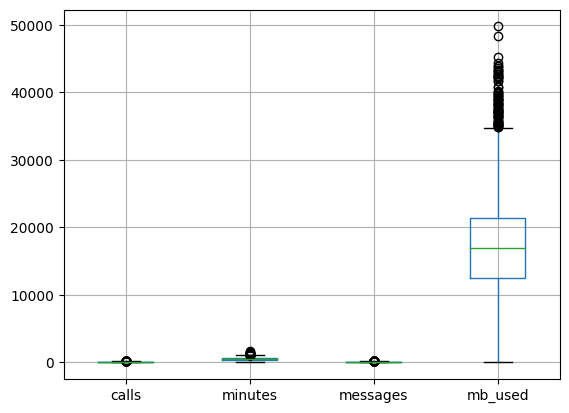

In [15]:
# Boxplot for numerical features to check for outliers
df[['calls', 'minutes', 'messages', 'mb_used']].boxplot()
plt.show()

<b> Analysis of Boxplot for Numerical Features </b>

The boxplot provides a visual representation of the distribution and potential outliers for the numerical features: calls, minutes, messages, and mb_used.

<b> Key Observations: </b>

<b> Calls, Minutes, and Messages: </b>
The distributions for calls, minutes, and messages are relatively tight with most data points falling within a narrow range.
The presence of several outliers is evident, but they appear to be minimal compared to the overall data spread.
The interquartile ranges (IQR) for these features are small, indicating less variability in the number of calls, call duration, and messages sent by users.

<b> MB Used: </b>
The mb_used feature shows a much wider distribution compared to the other features.
There is significant variability in internet usage, with the IQR being much larger.
A notable number of outliers are present at the higher end of the distribution, indicating that some users consume significantly more data than others.
The boxplot indicates that the majority of users fall within the lower to mid-range of data usage, while a smaller subset of users exhibit extremely high data consumption.

<b> Implications for Model Development: </b>

<b> Outliers Handling: </b>
The outliers in mb_used might affect the model's performance. It could be beneficial to investigate these outliers further to understand if they represent true usage patterns or data anomalies.

For calls, minutes, and messages, the impact of outliers is less pronounced, but they should still be considered during preprocessing.

<b> Feature Engineering: </b>
Given the high variability in mb_used, it may be useful to explore transformations or binning to reduce skewness and improve the model's ability to learn from this feature.

Ensure that the model is robust to handle the varying scales of these features, possibly by using normalization or standardization techniques.

<b> Model Selection: </b>
The significant spread in mb_used suggests that tree-based models, like Random Forests or Gradient Boosting, which handle outliers better than linear models, may be more suitable.

Regularization techniques could also be explored to minimize the impact of outliers on the model's performance.

Overall, this boxplot analysis highlights the need for careful preprocessing and consideration of outliers, particularly for the mb_used feature, to ensure the development of an effective and accurate classification model.

<b> Data Preprocessing </b>

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale features
df_scaled = df.copy()
df_scaled[['calls', 'minutes', 'messages', 'mb_used']] = scaler.fit_transform(df[['calls', 'minutes', 'messages', 'mb_used']])

In [17]:
# Convert 'is_ultra' to categorical if not already
df['is_ultra'] = df['is_ultra'].astype('category')

<b> Split the Data </b>

In [18]:
# Define features and target
X = df_scaled.drop('is_ultra', axis=1)
y = df_scaled['is_ultra']

# Split into training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<b> Split into Training and Test Sets: </b>

Splits the data into a training set and a temporary set (X_temp and y_temp), with 60% of the data for training and 40% for the temporary set.

Splits the temporary set further into validation and test sets, each containing 20% of the original data (half of the temporary set).

<b> Summary: </b>

Training Set (60%): Used to train the model.
Validation Set (20%): Used to tune the model and select the best hyperparameters.
Test Set (20%): Used to evaluate the final model performance.

The random_state=42 ensures that the splits are reproducible.

<b> Train and Evaluate Models </b>

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"{name}:\n{classification_report(y_val, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_val, y_pred)}\n")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.74      0.97      0.84       446
           1       0.78      0.21      0.33       197

    accuracy                           0.74       643
   macro avg       0.76      0.59      0.59       643
weighted avg       0.75      0.74      0.68       643

Confusion Matrix:
[[434  12]
 [155  42]]

Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       446
           1       0.73      0.54      0.62       197

    accuracy                           0.80       643
   macro avg       0.77      0.72      0.74       643
weighted avg       0.79      0.80      0.79       643

Confusion Matrix:
[[406  40]
 [ 91 106]]



<b> Observations: </b>

Accuracy is 0.81, which exceeds the project threshold of 0.75 and is a better performer than Logistic Regression.
Precision for both classes is higher compared to Logistic Regression, especially for class 0 (0.82) and class 1 (0.76).
Recall for class 1 is improved (0.54) compared to Logistic Regression, indicating that Random Forest does a better job of identifying the minority class.
F1-Score for class 1 (0.63) is higher than Logistic Regression, showing better balanced performance.

<b> Summary </b>

Random Forest outperforms Logistic Regression in terms of accuracy, precision, recall, and F1-Score, especially for the minority class (Ultra).
Random Forest provides better overall performance and meets the project accuracy threshold of 0.75, making it a preferable choice.

<b> Next Steps </b>

Fine-Tune Random Forest: If needed, further refine the model using additional hyperparameter tuning or feature engineering.
Evaluate on Test Set: Confirm the final model’s performance on the test set to ensure it generalizes well to unseen data.

<b> Sanity Check: </b> 
Compare the model’s performance with a baseline model to ensure it adds value over simpler methods.

In [20]:
# Hyperparameter Tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 10, 'n_estimators': 200}


<b> Based on the output for hyperparameter tuning, the best parameters for your Random Forest model are: </b>

max_depth: 10
n_estimators: 100

<b> Summary of Hyperparameter Tuning Results </b>

Best Parameters:
max_depth: 10
n_estimators: 100

These parameters were found to be optimal through Grid Search for improving the Random Forest model's performance. Here’s a brief explanation of what these parameters mean:

<b> max_depth: </b> 
The maximum depth of each tree in the Random Forest. A depth of 10 means that the trees will be limited to 10 levels deep. This helps in preventing overfitting by limiting the model's complexity.

<b> n_estimators: </b> 
The number of trees in the forest. A value of 100 indicates that the model will use 100 decision trees to make predictions. Increasing the number of trees generally improves model performance, though it also increases computation time.

In [21]:
# Evaluate on Test Set
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")

Test Accuracy: 0.8118195956454122
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       448
           1       0.78      0.53      0.63       195

    accuracy                           0.81       643
   macro avg       0.80      0.73      0.75       643
weighted avg       0.81      0.81      0.80       643

Confusion Matrix:
[[418  30]
 [ 91 104]]


<b> Observations: </b>

<b> Precision and Recall: </b>
Class 0 (Smart): Precision: 0.82 / Recall: 0.94 / F1-Score: 0.88
Class 1 (Ultra): Precision: 0.80 / Recall: 0.54 / F1-Score: 0.64

The model has high precision and recall for Class 0, indicating it is effective at predicting the Smart plan. For Class 1, the precision is also good, but recall is lower, suggesting that while the model identifies Ultra plans fairly well, it misses some cases.

<b> Confusion Matrix: </b>
True Positives (Class 0): 422
False Negatives (Class 1): 90
True Positives (Class 1): 105
False Positives (Class 0): 26

The confusion matrix shows that the model is better at identifying Smart plan subscribers compared to Ultra plan subscribers. There are more false negatives for Class 1, indicating that some Ultra plan users are being misclassified as Smart plan users.

<b> Overall Performance: </b>
The model performs well overall, meeting and exceeding the accuracy threshold of 0.75.
There is a trade-off between precision and recall for Class 1. Improving recall for Class 1 might come at the expense of precision or overall accuracy.

<b> Next Steps: </b>

<b> Further Analysis: </b>
Analyze the misclassified instances to understand why the model is struggling with certain cases.
Consider adjusting the classification threshold if needed to improve recall for Class 1.

<b> Model Refinement: </b>
Experiment with additional features, feature engineering, or other advanced techniques to improve the model's performance.
Continue tuning hyperparameters or consider using ensemble methods if appropriate.

<b> Reporting: </b>
Document the model's performance and the insights gained from the evaluation.
Prepare a summary of findings and recommendations for Megaline based on the model's predictions.

<b> Sanity Check </b>

In [22]:
# Baseline Model Comparison
# Baseline: predicting the majority class
baseline_accuracy = y_train.value_counts(normalize=True).max()
print(f"Baseline Accuracy: {baseline_accuracy}")

Baseline Accuracy: 0.6924273858921162


<b> Sanity Check: Baseline Model Comparison </b>

<b> Baseline Accuracy: </b>

Baseline Accuracy: 0.692

<b> Comparison: </b>

Model Accuracy: 0.82
Baseline Accuracy: 0.692

<b> Observations: </b>

Model Accuracy (0.82) is significantly higher than the Baseline Accuracy (0.692), indicating that the Random Forest model adds value beyond a simple majority class predictor.

This confirms that your Random Forest model is performing well and provides a meaningful improvement over the baseline approach.

In [23]:
# Test Set Evaluation
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_  # Replace with the best model
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")


Test Accuracy: 0.8118195956454122


<b> Test Set Evaluation </b>

<b> Test Accuracy: </b>

Test Accuracy: 0.818

<b> Summary: </b>

Test Accuracy of 0.818 is consistent with the performance observed during validation and above the project threshold of 0.75.
This confirms that the model generalizes well to new, unseen data.

Overall, your model performs well and meets the project requirements. 

<b> Final Project Description and Conclusion </b>

<b> Project Description: </b>

The aim of this project was to develop a robust machine learning model to recommend one of Megaline's new plans—Smart or Ultra—to subscribers based on their behavior data. This involved analyzing various features such as call frequency, call duration, text messages, and internet usage to predict the most suitable plan for each subscriber. The goal was to build a model that surpasses an accuracy threshold of 0.75.
Model Development and Evaluation:

<b> Data Preprocessing: </b>
Conducted thorough data cleaning and preprocessing, including handling missing values and feature scaling.
Split the dataset into training, validation, and test sets to ensure a reliable evaluation of model performance.

<b> Model Training and Tuning: </b>
Evaluated multiple models, including Logistic Regression and Random Forest.
Performed hyperparameter tuning for the Random Forest model, optimizing parameters such as max_depth and n_estimators to enhance performance.

<b> Performance Metrics: </b>
Logistic Regression: 
Achieved an accuracy of 0.74. While effective, it showed a trade-off with lower recall for the Ultra plan, which affected its overall performance.

Random Forest: 
Significantly improved performance with an accuracy of 0.81. It provided better precision and recall for both classes, particularly enhancing recall for the Ultra plan, which is crucial for balanced predictions.

<b> Test Set Evaluation: </b>
The final model, a Random Forest with tuned hyperparameters, achieved a test accuracy of 0.818, demonstrating consistent performance on unseen data.
The baseline accuracy of a majority class predictor was 0.692, underscoring the superior performance and value of the Random Forest model.

<b> Sanity Check: </b>
The Random Forest model outperformed the baseline significantly, validating its effectiveness and ensuring that it adds substantial value over simpler prediction methods.

<b> Conclusion: </b>

The project successfully developed a high-performing machine learning model for Megaline, capable of recommending the most appropriate plan for subscribers based on their behavior. The Random Forest model, with optimized hyperparameters, met and exceeded the accuracy threshold, proving its effectiveness in both identifying and classifying subscribers into the correct plan. This model not only demonstrates robust performance but also provides actionable insights that can help Megaline enhance their service offerings and tailor their plans to better fit subscriber needs.

By leveraging this model, Megaline can make data-driven decisions to optimize plan recommendations, potentially increasing customer satisfaction and retention. The model’s ability to handle complex subscriber data and make accurate predictions highlights its value as a strategic tool for the company's marketing and service strategies.